# Partition Problem
(see also [Wikipedia](https://en.wikipedia.org/wiki/Partition_problem))

The partition problem for a set of uniformly distributed numbers $\mathcal{S} = \{a_1, ..., a_N\}$ consists of finding two subsets $ \mathcal{S}_{1} \cup \mathcal{S}_2 =  \mathcal{S}$ such that the difference of the sums over the two subsets $\mathcal{S}_{1, 2}$ is as small as possible. The cost function in Ising form can be defined as 
$$
\hat C = -\left(\sum_{i=1}^{N} a_i \hat{Z}_i\right)^2 = \sum_{i<j\leq N} J_{ij} \hat{Z}_i \hat{Z}_j + \mathrm{const.}
$$
with $J_{ij}=-2a_i a_j$. The goal is then to _maximize_ $\hat C$.


In [89]:
using DrWatson
@quickactivate "QAOA.jl"

include("../src/QAOA.jl")

using PyPlot
PyPlot.plt.style.use("paper.mplstyle")
using PyCall
np = pyimport("numpy");

In [90]:
N = 4
np.random.seed(1)
a = np.random.uniform(size=N)
println(a)

[0.417022004702574, 0.7203244934421581, 0.00011437481734488664, 0.30233257263183977]


In [91]:
J = -2 * np.outer(a |> transpose, a)
np.fill_diagonal(J, 0.)  

In [92]:
p = 4
problem = QAOA.Problem(p, zeros(N), J)

Main.QAOA.Problem
  num_qubits: Int64 4
  num_layers: Int64 4
  local_fields: Array{Real}((4,)) Real[0.0, 0.0, 0.0, 0.0]
  couplings: Array{Real}((4, 4)) Real[0.0 -0.6007823285832298 -9.539363123331071e-5 -0.25215867105163275; -0.6007823285832298 0.0 -0.00016477396473298965 -0.43555511446418893; -9.539363123331071e-5 -0.00016477396473298965 0.0 -6.915846554435269e-5; -0.25215867105163275 -0.43555511446418893 -6.915846554435269e-5 0.0]
  driver: YaoBlocks.ConstGate.XGate X


__Using the wrapper function:__

In [93]:
partition_problem = QAOA.partition_problem(a, num_layers=p)

Main.QAOA.Problem
  num_qubits: Int64 4
  num_layers: Int64 4
  local_fields: Array{Real}((4,)) Real[0.0, 0.0, 0.0, 0.0]
  couplings: Array{Real}((4, 4)) Real[0.0 -0.6007823285832298 -9.539363123331071e-5 -0.25215867105163275; -0.6007823285832298 0.0 -0.00016477396473298965 -0.43555511446418893; -9.539363123331071e-5 -0.00016477396473298965 0.0 -6.915846554435269e-5; -0.25215867105163275 -0.43555511446418893 -6.915846554435269e-5 0.0]
  driver: YaoBlocks.ConstGate.XGate X


__Gradient optimization with [Zygote](https://fluxml.ai/Zygote.jl/latest/):__

In [94]:
learning_rate = 0.05
cost, params, probs = QAOA.optimize_parameters(partition_problem, vcat([0.5 for _ in 1:p], [0.5 for _ in 1:p]); learning_rate=learning_rate)

(0.6929984079160132, [0.4184650916137725, 0.8682807298150977, 0.7694432831411955, 0.27701401939879555, 0.9567553045776404, 0.7450141052431506, -0.011127517528605737, 1.090117046114434], [0.00013063202857128194, 0.05144898302909395, 0.19319918864610724, 0.005230304151213926, 0.00013136319453834768, 0.051477301425649345, 0.19315063976577795, 0.005231587759047683, 0.005231587759047683, 0.19315063976577795, 0.051477301425649345, 0.00013136319453834768, 0.005230304151213926, 0.19319918864610724, 0.05144898302909395, 0.00013063202857128194])

__Optimization with [NLopt](https://nlopt.readthedocs.io/en/latest/):__

In [95]:
cost, params, probs = QAOA.optimize_parameters(partition_problem, vcat([0.5 for _ in 1:p], [0.5 for _ in 1:p]), :LN_COBYLA)

(0.7082712483358824, [0.29075163390787356, 0.3137026309121307, 1.3374312700295328, 0.4282478859105209, 0.8320897937421404, 1.1342376735074426, 0.6044669427283843, 0.6812614267419678], [0.0002249202801558409, 0.045073302797252315, 0.2018800545418741, 0.002826597684404648, 0.00022276179505235403, 0.04510684811471382, 0.20182923423344634, 0.002836280553100816, 0.002836280553100816, 0.20182923423344634, 0.04510684811471382, 0.00022276179505235403, 0.002826597684404648, 0.2018800545418741, 0.045073302797252315, 0.0002249202801558409])

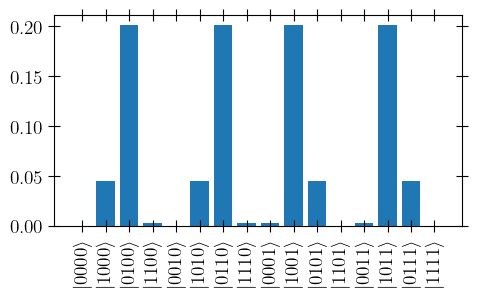

In [122]:
xlabels = []
for bstr in digits.(0:2^N-1, base=2, pad=N)
    push!(xlabels, "\$|" * prod([string(b) for b in bstr]) * "\\rangle\$")
end

figure(figsize=(5, 3.2))
ax = subplot(111)
bar(0:2^N-1, probs)
ax.set_xticks(0:2^N-1)
ax.set_xticklabels(xlabels, rotation=90)
minorticks_off()
tight_layout()

In [118]:
println(a)

[0.417022004702574, 0.7203244934421581, 0.00011437481734488664, 0.30233257263183977]
